In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings("ignore")

# import matplotlib.font_manager
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]

In [2]:
def create_folder(temp_path):
    if os.path.isdir(temp_path):
        pass
    else:
        os.mkdir(temp_path)

In [3]:
data_type = "test"; predict_time = 1
save_path = "./result/"
file_name = f"scatter_{data_type}_{predict_time}"
temp_data_path = glob.glob(f"./datasets/test_1/*{data_type}*predict_{predict_time}*")[0]
temp_data = pd.read_csv(temp_data_path, index_col = 0)

In [4]:
temp_x = temp_data.iloc[:,1]
temp_y = temp_data.iloc[:,0]

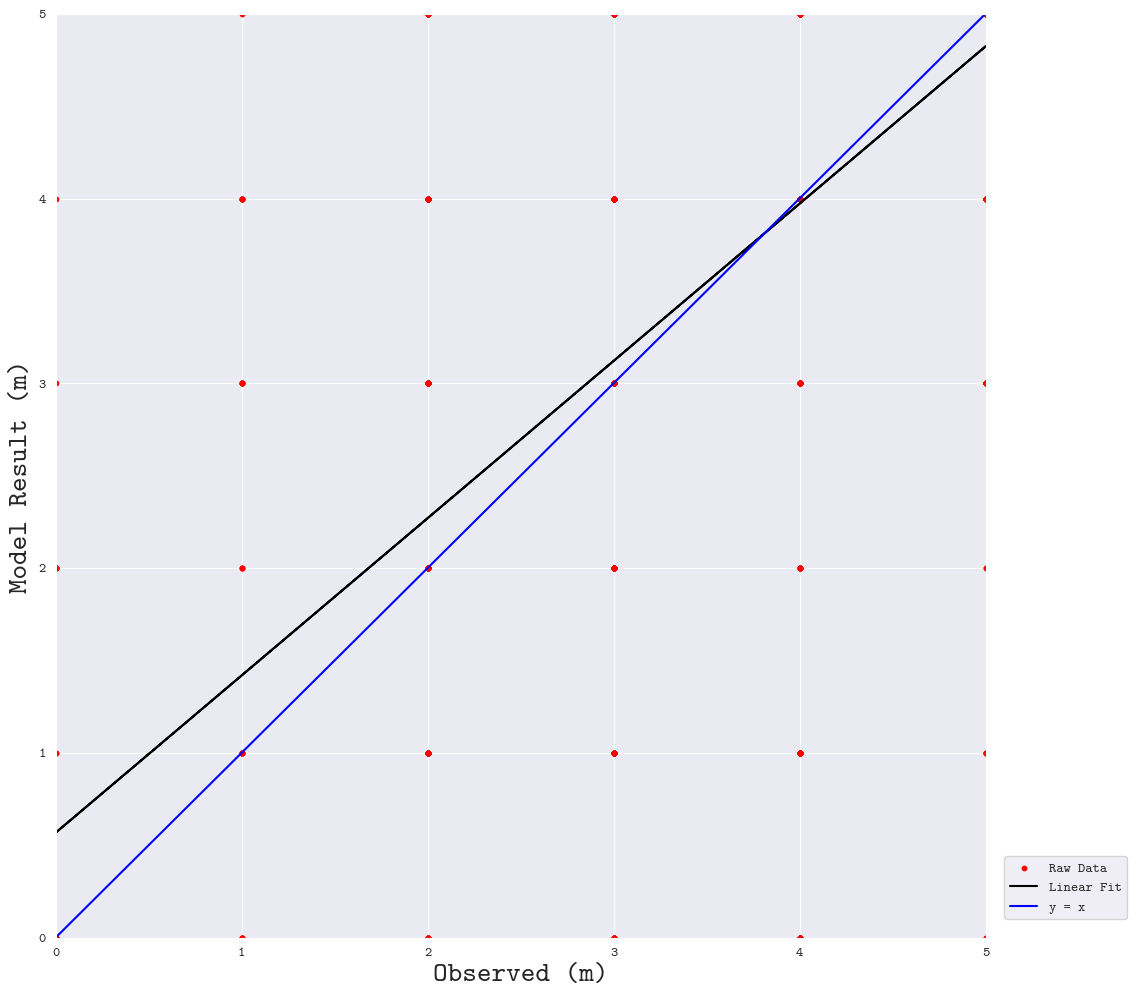

In [5]:
plt.rcParams['font.family'] = "cmtt10"
plt.figure(figsize=(12,12))

plt.scatter(temp_x, temp_y, s = 10, marker = "o",label = "Raw Data", color = 'red')

plt.legend(loc = (1.02, 0.02)) # plt.legend(loc = 'best')
plt.xlabel("Observed (m)", fontsize = 20)
plt.ylabel("Model Result (m)", fontsize = 20)

# 선 그리기
linfit = np.polyfit(temp_x, temp_y, 1)
f_1d = np.poly1d(linfit)
plt.plot(temp_x, f_1d(temp_x), label = "Linear Fit", color = 'black')

# x=y 축 그리기
temp_min = min(temp_x.min(), temp_y.min())
temp_max = max(temp_x.max(), temp_y.max())
plt.plot([temp_min, temp_max], [temp_min, temp_max], label = "y = x", color = 'blue')

# x축 y축 범위 설정
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.legend(loc = (1.02, 0.02)) # plt.legend(loc = 'best')

try:
    plt.savefig(f"{save_path}{file_name}.png")
except:
    create_folder(save_path)
    plt.savefig(f"{save_path}{file_name}.png")
    
plt.show()